# Image Resize

to (416, 416, 3)

In [2]:
# 라이브러리
import os
import cv2
import pandas as pd
from matplotlib import pyplot as plt

plt.rcParams["figure.figsize"]=10, 10

In [5]:
def ratio_multiply(num, ratio=1):
    return int(num*ratio)

# bounding box 좌표 변경하기
def cvt_coordinate(center_x, center_y, w, h, ratio=1):
    '''
    start_x, start_y: 시작 꼭짓점 좌표 (x, y)
    end_x, end_y: 종료 꼭짓점 좌표 (x, y)
    ratio: resize 비율
    '''
    start_x, end_x = center_x - (w//2), center_x + (w//2)
    start_y, end_y = center_y - (h//2), center_y + (h//2)
    
    start_x = ratio_multiply(start_x, ratio)
    start_y = ratio_multiply(start_y, ratio) 
    end_x = ratio_multiply(end_x, ratio)
    end_y = ratio_multiply(end_y, ratio)
    
    return str(start_x), str(start_y), str(end_x), str(end_y)

def make_image(idx):
    img = cv2.imread(img_list[idx])
    df = pd.read_csv(txt_list[idx])
    ratio = 0.07

    resized_img = cv2.resize(img, None, fx=ratio, fy=ratio, interpolation=cv2.INTER_AREA)

    # bounding box
    for i in range(6):
        sr = df.iloc[i]
        center_x, center_y, w, h = sr[1], sr[2], sr[3], sr[4]
        start_x, start_y, end_x, end_y = cvt_coordinate(center_x, center_y, w, h, ratio)
    #     print(start_x, start_y, end_x, end_y)
        resized_img = cv2.rectangle(resized_img, (start_x, start_y), (end_x, end_y), (0, 0, 255), 3)

    print("shape:", resized_img.shape)

    plt.imshow(resized_img)
    plt.show()

In [3]:
# data path 설정
DATA_PATH = '../data/'
data_list = os.listdir(DATA_PATH)

# 이미지와 라벨 데이터 
img_list = []
txt_list = []

for data in data_list:
    if data == 'img' or data == 'train_annotation.txt':
        pass
    else:
        data = DATA_PATH + data
        if data.endswith('txt'):
            txt_list.append(data)
        else:
            img_list.append(data)

txt_list.sort()
img_list.sort()

print(len(img_list), len(txt_list))

2322 2322


(7581, 3019, 3)


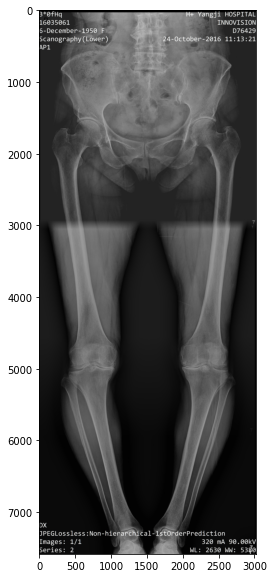

In [5]:
# cv2로 이미지 읽기
img = cv2.imread(img_list[0])
print(img.shape)
# plt로 이미지 읽기
plt.imshow(img)
plt.show()

In [31]:
f = open('../data/resized_train_annotation.txt', 'w')
n = len(txt_list)
anno_len = 6
ratio = 0.1

for i in range(n):
    # image
    img = cv2.imread(img_list[idx])
    resized_img = cv2.resize(img, None, fx=ratio, fy=ratio, interpolation=cv2.INTER_AREA)
    
    # annotation
    data = []
    
    title = txt_list[i].split('/')[-1]
    cv2.imwrite('../data/img/'+ title[:-3] + 'jpg', resized_img)  # Save img
    title = './data/img/' + title[:-3] + 'jpg'
    
    df = pd.read_csv(txt_list[i])    
    for j in range(anno_len):
        val = df.iloc[j].tolist()
        center_x, center_y, w, h = val[1], val[2], val[3], val[4]
#         start_x, start_y, end_x, end_y = cvt_coordinate(center_x, center_y, w, h)
        start_x, start_y, end_x, end_y = cvt_coordinate(center_x, center_y, w, h, ratio)
        coordinate = [start_x, start_y, end_x, end_y, str(val[0])]        
        data.extend(coordinate)
        
    res = ','.join(data)    
    res = title + ' ' + res + '\n'
    f.write(res)
f.close()
print("Save Annotation txt")

Save Annotation txt


# 정리

## Image Resize and data annotation

In [10]:
# path 설정
'''
val or train or test
'''
DATA_PATH = '../data/org_test/'
file_path = '../data/test_annotation.txt'
title_path = './data/test/'
img_save_path = '../data/test/'

data_list = os.listdir(DATA_PATH)
print(len(data_list))

# 이미지와 라벨 데이터 
img_list = []
txt_list = []

for data in data_list:
    data = DATA_PATH + data
    if data.endswith('txt'):
        txt_list.append(data)
    else:
        img_list.append(data)

txt_list.sort()
img_list.sort()

print(len(img_list), len(txt_list))

f = open(file_path, 'w')
n = len(txt_list)
anno_len = 6
ratio = 0.1

for i in range(n):
    # image
    img = cv2.imread(img_list[i])
    resized_img = cv2.resize(img, None, fx=ratio, fy=ratio, interpolation=cv2.INTER_AREA)
    
    # annotation
    data = []
    
    title = txt_list[i].split('/')[-1]
    cv2.imwrite(img_save_path+ title[:-3] + 'jpg', resized_img)  # Save img
    title = title_path + title[:-3] + 'jpg'
    
    df = pd.read_csv(txt_list[i])    
    for j in range(anno_len):
        val = df.iloc[j].tolist()
        center_x, center_y, w, h = val[1], val[2], val[3], val[4]
#         start_x, start_y, end_x, end_y = cvt_coordinate(center_x, center_y, w, h)
        start_x, start_y, end_x, end_y = cvt_coordinate(center_x, center_y, w, h, ratio)
        coordinate = [start_x, start_y, end_x, end_y, str(val[0])]        
        data.extend(coordinate)
        
    res = ','.join(data)    
    res = title + ' ' + res + '\n'
    f.write(res)
f.close()
print("Save Annotation txt")

458
229 229
Save Annotation txt
